In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd gdrive/MyDrive/zzzz/
!ls

/content/gdrive/MyDrive/zzzz
data3.csv  kddcup.data_10_percent


In [ ]:
# !curl -O https://datahub.io/machine-learning/kddcup99/r/kddcup99_zip.zip
# !curl -O http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
!curl -O http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2094k  100 2094k    0     0  2249k      0 --:--:-- --:--:-- --:--:-- 2249k


In [ ]:
# import zipfile

# zip_ref = zipfile.ZipFile("/content/drive/My Drive/ML/DataSet.zip", 'r')
# zip_ref.extractall("/tmp")
# zip_ref.close()


# !unzip -q kddcup99_zip
!ls

data3.csv  kddcup.data_10_percent  kddcup.data_10_percent.gz


In [ ]:
!gzip -d kddcup.data_10_percent.gz
!ls

gzip: kddcup.data_10_percent already exists; do you wish to overwrite (y or n)? n
	not overwritten
data3.csv  kddcup.data_10_percent  kddcup.data_10_percent.gz


In [ ]:
import csv

items = ('duration', 'protocol_type', 'service', 'src_bytes', 'dst_bytes', 'flag', 'land', 'wrong_fragment',
         'urgent','hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
         'num_root', 'num_file_creations','num_shells', 'num_access_files', 'num_outbound_cmds', 'is_hot_login',
         'is_guest_login','count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_count',
         'srv_serror_rate', 'srv_rerror_rate', 'srv_diff_host_rate','unknown_data1','unknown_data2','unknown_data3',
         'unknown_data4','unknown_data5','unknown_data6','unknown_data7','unknown_data8','unknown_data9',
         'unknown_data10','results')


with open ("kddcup.data_10_percent",'r') as file:
    stripped = (line.strip() for line in file)
    lines = (line.split(",") for line in stripped if line)
    with open ("data3.csv",'w', newline='') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(items)
        writer.writerows(lines)
        

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
dataframe = pd.read_csv('data3.csv')


# dataframe["results"]= dataframe["results"].replace({'normal.'         :0,
#                                                     'spy.'            :1,
#                                                     'warezmaster.'    :2,
#                                                     'loadmodule.'     :3,
#                                                     'ipsweep.'        :4,
#                                                     'guess_passwd.'   :5,
#                                                     'back.'           :6,
#                                                     'pod.'            :7,
#                                                     'land.'           :8,
#                                                     'ftp_write.'      :9,
#                                                     'rootkit.'        :10,
#                                                     'teardrop.'       :11,
#                                                     'portsweep.'      :12,
#                                                     'smurf.'          :13,
#                                                     'imap.'           :14,
#                                                     'buffer_overflow.':15,
#                                                     'phf.'            :16,
#                                                     'perl.'           :17,
#                                                     'nmap.'           :18,
#                                                     'satan.'          :19,
#                                                     'multihop.'       :20,
#                                                     'warezclient.'    :21,
#                                                     'neptune.'        :22 }, inplace=True)


dataframe["results"]= dataframe["results"].replace('normal.'        ,0)
dataframe["results"]= dataframe["results"].replace('spy.'            ,1)
dataframe["results"]= dataframe["results"].replace('warezmaster.'    ,1)
dataframe["results"]= dataframe["results"].replace('loadmodule.'     ,1)
dataframe["results"]= dataframe["results"].replace('ipsweep.'        ,1) #1247
dataframe["results"]= dataframe["results"].replace('guess_passwd.'   ,1)
dataframe["results"]= dataframe["results"].replace('back.'           ,1) #2203
dataframe["results"]= dataframe["results"].replace('pod.'            ,1)
dataframe["results"]= dataframe["results"].replace('land.'           ,1)
dataframe["results"]= dataframe["results"].replace('ftp_write.'      ,1)
dataframe["results"]= dataframe["results"].replace('rootkit.'        ,1)
dataframe["results"]= dataframe["results"].replace('teardrop.'       ,1) #979
dataframe["results"]= dataframe["results"].replace('portsweep.'      ,1) #1024
dataframe["results"]= dataframe["results"].replace('smurf.'          ,1) #280790
dataframe["results"]= dataframe["results"].replace('imap.'           ,1)
dataframe["results"]= dataframe["results"].replace('buffer_overflow.',1)
dataframe["results"]= dataframe["results"].replace('phf.'            ,1)
dataframe["results"]= dataframe["results"].replace('perl.'           ,1)
dataframe["results"]= dataframe["results"].replace('nmap.'           ,1)
dataframe["results"]= dataframe["results"].replace('satan.'          ,1) #1589
dataframe["results"]= dataframe["results"].replace('multihop.'       ,1)
dataframe["results"]= dataframe["results"].replace('warezclient.'    ,1) #1020
dataframe["results"]= dataframe["results"].replace('neptune.'        ,1) #107201




dataframe.dropna()

print(dataframe.shape)
dataframe.head()

(494021, 42)


,duration,protocol_type,service,src_bytes,dst_bytes,flag,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_hot_login,is_guest_login,count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_count,srv_serror_rate,srv_rerror_rate,srv_diff_host_rate,unknown_data1,unknown_data2,unknown_data3,unknown_data4,unknown_data5,unknown_data6,unknown_data7,unknown_data8,unknown_data9,unknown_data10,results
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
val_dataframe = dataframe.sample(frac=0.2, random_state=1337)
train_dataframe = dataframe.drop(val_dataframe.index)

In [ ]:
new_labels1 = []
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("results")

    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds


train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)

for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)
    
train_ds = train_ds.batch(32)
val_ds = val_ds.batch(32)

Input: {'duration': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'protocol_type': <tf.Tensor: shape=(), dtype=string, numpy=b'tcp'>, 'service': <tf.Tensor: shape=(), dtype=string, numpy=b'private'>, 'src_bytes': <tf.Tensor: shape=(), dtype=string, numpy=b'S0'>, 'dst_bytes': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'flag': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'land': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'wrong_fragment': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'urgent': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'hot': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'num_failed_logins': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'logged_in': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'num_compromised': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'root_shell': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'su_attempted': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'num_root': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'num_file_creations': <tf.Tensor: shape

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers.experimental.preprocessing import CategoryEncoding
from tensorflow.keras.layers.experimental.preprocessing import StringLookup


def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    normalizer = Normalization()

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    encoded_feature = normalizer(feature)
    return encoded_feature


def encode_string_categorical_feature(feature, name, dataset):
    index = StringLookup()

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    index.adapt(feature_ds)

    encoded_feature = index(feature)

    encoder = CategoryEncoding(output_mode="binary")

    feature_ds = feature_ds.map(index)

    encoder.adapt(feature_ds)

    encoded_feature = encoder(encoded_feature)
    return encoded_feature


def encode_integer_categorical_feature(feature, name, dataset):
    encoder = CategoryEncoding(output_mode="binary")

    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    encoder.adapt(feature_ds)

    encoded_feature = encoder(feature)
    return encoded_feature

In [ ]:
duration = keras.Input(shape=(1,), name="duration")
protocol_type = keras.Input(shape=(1,), name="protocol_type", dtype="string")
service = keras.Input(shape=(1,), name="service", dtype="string")
src_bytes = keras.Input(shape=(1,), name="src_bytes", dtype="string")
dst_bytes = keras.Input(shape=(1,), name="dst_bytes")
flag = keras.Input(shape=(1,), name="flag")
land = keras.Input(shape=(1,), name="land")
wrong_fragment = keras.Input(shape=(1,), name="wrong_fragment")
urgent = keras.Input(shape=(1,), name="urgent")
hot = keras.Input(shape=(1,), name="hot")
num_failed_logins = keras.Input(shape=(1,), name="num_failed_logins")
logged_in = keras.Input(shape=(1,), name="logged_in")
num_compromised = keras.Input(shape=(1,), name="num_compromised")
root_shell = keras.Input(shape=(1,), name="root_shell")
su_attempted = keras.Input(shape=(1,), name="su_attempted")
num_root = keras.Input(shape=(1,), name="num_root")
num_file_creations = keras.Input(shape=(1,), name="num_file_creations")
num_shells = keras.Input(shape=(1,), name="num_shells")
num_access_files = keras.Input(shape=(1,), name="num_access_files")
num_outbound_cmds = keras.Input(shape=(1,), name="num_outbound_cmds")
is_hot_login = keras.Input(shape=(1,), name="is_hot_login")
is_guest_login = keras.Input(shape=(1,), name="is_guest_login")
count = keras.Input(shape=(1,), name="count")
serror_rate = keras.Input(shape=(1,), name="serror_rate")
rerror_rate = keras.Input(shape=(1,), name="rerror_rate")
same_srv_rate = keras.Input(shape=(1,), name="same_srv_rate")
diff_srv_rate = keras.Input(shape=(1,), name="diff_srv_rate")
srv_count = keras.Input(shape=(1,), name="srv_count")
srv_serror_rate = keras.Input(shape=(1,), name="srv_serror_rate")
srv_rerror_rate = keras.Input(shape=(1,), name="srv_rerror_rate")
srv_diff_host_rate = keras.Input(shape=(1,), name="srv_diff_host_rate")
unknown_data1 = keras.Input(shape=(1,), name="unknown_data1")
unknown_data2 = keras.Input(shape=(1,), name="unknown_data2")
unknown_data3 = keras.Input(shape=(1,), name="unknown_data3")
unknown_data4 = keras.Input(shape=(1,), name="unknown_data4")
unknown_data5 = keras.Input(shape=(1,), name="unknown_data5")
unknown_data6 = keras.Input(shape=(1,), name="unknown_data6")
unknown_data7 = keras.Input(shape=(1,), name="unknown_data7")
unknown_data8 = keras.Input(shape=(1,), name="unknown_data8")
unknown_data9 = keras.Input(shape=(1,), name="unknown_data9")
unknown_data10 = keras.Input(shape=(1,), name="unknown_data10")


all_inputs = [duration,
              protocol_type, 
              service, 
              src_bytes, 
              dst_bytes, 
              flag, 
              land, 
              wrong_fragment,
              urgent,
              hot, 
              num_failed_logins, 
              logged_in, 
              num_compromised, 
              root_shell, 
              su_attempted, 
              num_root, 
              num_file_creations,
              num_shells, 
              num_access_files, 
              num_outbound_cmds, 
              is_hot_login, 
              is_guest_login,
              count, 
              serror_rate, 
              rerror_rate, 
              same_srv_rate, 
              diff_srv_rate, 
              srv_count, 
              srv_serror_rate, 
              srv_rerror_rate, 
              srv_diff_host_rate,
              unknown_data1,
              unknown_data2,
              unknown_data3,
              unknown_data4,
              unknown_data5,
              unknown_data6,
              unknown_data7,
              unknown_data8,
              unknown_data9,
              unknown_data10
             ]

In [ ]:
duration_encoded = encode_numerical_feature(duration, "duration", train_ds)

protocol_type_encoded = encode_string_categorical_feature(protocol_type,"protocol_type", train_ds)
service_encoded = encode_string_categorical_feature(service, "service", train_ds)
src_bytes_encoded = encode_string_categorical_feature(src_bytes,"src_bytes", train_ds)


dst_bytes_encoded           = encode_numerical_feature(dst_bytes,"dst_bytes", train_ds)
flag_encoded                = encode_numerical_feature(flag, "flag", train_ds)
land_encoded                = encode_numerical_feature(land, "land", train_ds)
wrong_fragment_encoded      = encode_numerical_feature(wrong_fragment, "wrong_fragment", train_ds)
urgent_encoded              = encode_numerical_feature(urgent, "urgent", train_ds)
hot_encoded                 = encode_numerical_feature(hot, "hot", train_ds)
num_failed_logins_encoded   = encode_numerical_feature(num_failed_logins, "num_failed_logins", train_ds)
logged_in_encoded           = encode_numerical_feature(logged_in, "logged_in", train_ds)
num_compromised_encoded     = encode_numerical_feature(num_compromised, "num_compromised", train_ds)
root_shell_encoded          = encode_numerical_feature(root_shell, "root_shell", train_ds)
su_attempted_encoded        = encode_numerical_feature(su_attempted, "su_attempted", train_ds)
num_root_encoded            = encode_numerical_feature(num_root, "num_root", train_ds)
num_file_creations_encoded  = encode_numerical_feature(num_file_creations, "num_file_creations", train_ds)
num_shells_encoded          = encode_numerical_feature(num_shells, "num_shells", train_ds)
num_access_files_encoded    = encode_numerical_feature(num_access_files, "num_access_files", train_ds)
num_outbound_cmds_encoded   = encode_numerical_feature(num_outbound_cmds, "num_outbound_cmds", train_ds)
is_hot_login_encoded        = encode_numerical_feature(is_hot_login, "is_hot_login", train_ds)
is_guest_login_encoded      = encode_numerical_feature(is_guest_login, "is_guest_login", train_ds)
count_encoded               = encode_numerical_feature(count, "count", train_ds)
serror_rate_encoded         = encode_numerical_feature(serror_rate, "serror_rate", train_ds)
rerror_rate_encoded         = encode_numerical_feature(rerror_rate, "rerror_rate", train_ds)
same_srv_rate_encoded       = encode_numerical_feature(same_srv_rate, "same_srv_rate", train_ds)
diff_srv_rate_encoded       = encode_numerical_feature(diff_srv_rate, "diff_srv_rate", train_ds)
srv_count_encoded           = encode_numerical_feature(srv_count, "srv_count", train_ds)
srv_serror_rate_encoded     = encode_numerical_feature(srv_serror_rate, "srv_serror_rate", train_ds)
srv_rerror_rate_encoded     = encode_numerical_feature(srv_rerror_rate, "srv_rerror_rate", train_ds)
srv_diff_host_rate_encoded  = encode_numerical_feature(srv_diff_host_rate, "srv_diff_host_rate", train_ds)
unknown_data1_encoded = encode_numerical_feature(unknown_data1, "unknown_data1", train_ds)
unknown_data2_encoded = encode_numerical_feature(unknown_data2, "unknown_data2", train_ds)
unknown_data3_encoded = encode_numerical_feature(unknown_data3, "unknown_data3", train_ds)
unknown_data4_encoded = encode_numerical_feature(unknown_data4, "unknown_data4", train_ds)
unknown_data5_encoded = encode_numerical_feature(unknown_data5, "unknown_data5", train_ds)
unknown_data6_encoded = encode_numerical_feature(unknown_data6, "unknown_data6", train_ds)
unknown_data7_encoded = encode_numerical_feature(unknown_data7, "unknown_data7", train_ds)
unknown_data8_encoded = encode_numerical_feature(unknown_data8, "unknown_data8", train_ds)
unknown_data9_encoded = encode_numerical_feature(unknown_data9, "unknown_data9", train_ds)
unknown_data10_encoded = encode_numerical_feature(unknown_data10, "unknown_data10", train_ds)



all_features = layers.concatenate(
    [
        duration_encoded,
        protocol_type_encoded, 
        service_encoded, 
        src_bytes_encoded, 
        dst_bytes_encoded,
        flag_encoded, 
        land_encoded, 
        wrong_fragment_encoded,
        urgent_encoded,
        hot_encoded, 
        num_failed_logins_encoded, 
        logged_in_encoded, 
        num_compromised_encoded, 
        root_shell_encoded, 
        su_attempted_encoded, 
        num_root_encoded, 
        num_file_creations_encoded,
        num_shells_encoded, 
        num_access_files_encoded, 
        num_outbound_cmds_encoded, 
        is_hot_login_encoded, 
        is_guest_login_encoded,
        count_encoded, 
        serror_rate_encoded, 
        rerror_rate_encoded, 
        same_srv_rate_encoded, 
        diff_srv_rate_encoded, 
        srv_count_encoded, 
        srv_serror_rate_encoded, 
        srv_rerror_rate_encoded, 
        srv_diff_host_rate_encoded,
        unknown_data1_encoded,
        unknown_data2_encoded,
        unknown_data3_encoded,
        unknown_data4_encoded,
        unknown_data5_encoded,
        unknown_data6_encoded,
        unknown_data7_encoded,
        unknown_data8_encoded,
        unknown_data9_encoded,
        unknown_data10_encoded,

    ]
)

In [ ]:
from tensorflow.keras.optimizers import Adam

x = layers.Dense(7, activation="relu")(all_features)
x = layers.Dropout(0.5)(x)

x1 = layers.Dense(32, activation="relu")(x)
x1 = layers.Dropout(0.3)(x1)

# x2 = layers.Dense(64, activation="relu")(x)
# x2 = layers.Dropout(0.3)(x1)

# x3 = layers.Dense(32, activation="relu")(x2)
# x3 = layers.Dropout(0.3)(x2)

output = layers.Dense(1, activation="sigmoid")(x1)

model = keras.Model(all_inputs, output)

model.compile(optimizer=Adam(learning_rate=0.0000001), loss='binary_crossentropy', metrics=['accuracy'])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
protocol_type (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
service (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
src_bytes (InputLayer)          [(None, 1)]          0                                            
__________________________________________________________________________________________________
duration (InputLayer)           [(None, 1)]          0                                            
______________________________________________________________________________________________

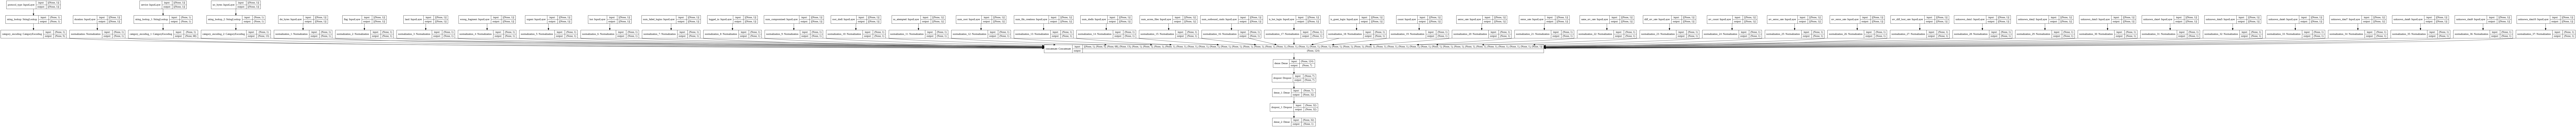

In [ ]:
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
import datetime, os

%load_ext tensorboard

batch_size = 128
epochs = 500


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=0,write_images=False,)

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),

            ]

model.fit(train_ds, epochs=5, validation_data=val_ds,callbacks=[tensorboard_callback])

In [ ]:
%tensorboard --logdir logs